<a href="https://colab.research.google.com/github/rlauzin/2022ITB/blob/main/classification_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=f50a236d07ef8d4b81da75a25f13bcac0444fdf7232d38c3c53838b202b005c4
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.9 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/HomeWork/health_data.csv") 

print(health.columns)
display(health.info())
display(health.head())

Index(['HCHK_YEAR', 'IDV_ID', 'SIDO', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
       'HCHK_OE_INSPEC_YN', '치아우식증유무', '치석', 'DATA_STD__DT'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HCHK_YEAR          10000 non-null  int64  
 1   IDV_ID             10000 non-null  int64  
 2   SIDO               10000 non-null  int64  
 3   SEX                10000 non-null  object 
 4   AGE_GROUP          10000 non-null  int64  
 5   HEIGHT             10000 non-null  int64  
 6   WEIGHT             10000 non-null  int64  
 7   WAIST              

None

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,치아우식증유무,치석,DATA_STD__DT
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [7]:
heal = health.copy()

heal['SMK_STAT_TYPE_CD'].fillna('No', inplace=True)
heal['DRK_YN'].fillna('No', inplace=True)
heal['BP_HIGH']= heal['BP_HIGH'].fillna(heal['BP_HIGH'].mean())
heal['BP_LWST']= heal['BP_LWST'].fillna(heal['BP_LWST'].mean())
heal['BLDS']= heal['BLDS'].fillna(heal['BLDS'].mean())
heal['HMG']= heal['HMG'].fillna(heal['HMG'].mean())
heal['OLIG_PROTE_CD']= heal['OLIG_PROTE_CD'].fillna(heal['OLIG_PROTE_CD'].mean())
heal['CREATININE']= heal['CREATININE'].fillna(heal['CREATININE'].mean())
heal['SGOT_AST']= heal['SGOT_AST'].fillna(heal['SGOT_AST'].mean())
heal['SGPT_ALT']= heal['SGPT_ALT'].fillna(heal['SGPT_ALT'].mean())
heal['GAMMA_GTP']= heal['GAMMA_GTP'].fillna(heal['GAMMA_GTP'].mean())

print(heal.isna().sum())

HCHK_YEAR               0
IDV_ID                  0
SIDO                    0
SEX                     0
AGE_GROUP               0
HEIGHT                  0
WEIGHT                  0
WAIST                   0
SIGHT_LEFT              0
SIGHT_RIGHT             0
HEAR_LEFT               0
HEAR_RIGHT              0
BP_HIGH                 0
BP_LWST                 0
BLDS                    0
총콜레스테롤               5956
트리글리세라이드             5956
HDL콜레스테롤             5956
LDL콜레스테롤             6023
HMG                     0
OLIG_PROTE_CD           0
CREATININE              0
SGOT_AST                0
SGPT_ALT                0
GAMMA_GTP               0
SMK_STAT_TYPE_CD        0
DRK_YN                  0
HCHK_OE_INSPEC_YN       0
치아우식증유무              6749
치석                   6749
DATA_STD__DT            0
dtype: int64


In [8]:
heal = heal.drop(["IDV_ID", "총콜레스테롤", "트리글리세라이드", "HDL콜레스테롤", "LDL콜레스테롤", "치아우식증유무", "치석", "DATA_STD__DT"], axis = 1)

In [9]:
display(heal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HCHK_YEAR          10000 non-null  int64  
 1   SIDO               10000 non-null  int64  
 2   SEX                10000 non-null  object 
 3   AGE_GROUP          10000 non-null  int64  
 4   HEIGHT             10000 non-null  int64  
 5   WEIGHT             10000 non-null  int64  
 6   WAIST              10000 non-null  float64
 7   SIGHT_LEFT         10000 non-null  float64
 8   SIGHT_RIGHT        10000 non-null  float64
 9   HEAR_LEFT          10000 non-null  int64  
 10  HEAR_RIGHT         10000 non-null  int64  
 11  BP_HIGH            10000 non-null  float64
 12  BP_LWST            10000 non-null  float64
 13  BLDS               10000 non-null  float64
 14  HMG                10000 non-null  float64
 15  OLIG_PROTE_CD      10000 non-null  float64
 16  CREATININE         1000

None

In [10]:
heal["GAMMAGTP"] = np.where((heal["SEX"] == "M") & (heal["GAMMA_GTP"] < 64) & (heal["GAMMA_GTP"] > 11), "Yes", (np.where((heal["SEX"] == "F") & (heal["GAMMA_GTP"] < 36) & (heal["GAMMA_GTP"] > 8),"Yes", "No")))
print(heal["GAMMAGTP"].value_counts())

Yes    8169
No     1831
Name: GAMMAGTP, dtype: int64


In [11]:
category = heal.loc[:, ["SIDO", "SEX", "SMK_STAT_TYPE_CD", "DRK_YN", "HCHK_OE_INSPEC_YN"]]
category.head(10)

,SIDO,SEX,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN
0,36,M,No,No,0
1,27,F,No,No,0
2,11,F,No,No,0
3,31,M,No,No,1
4,41,F,No,No,0
5,27,M,Yes,Yes,0
6,44,M,Yes,Yes,1
7,41,M,Yes,No,1
8,41,F,No,No,0
9,48,F,No,No,0


In [12]:
dummy = pd.get_dummies(category, columns = ["SIDO", "SEX", "SMK_STAT_TYPE_CD", "DRK_YN", "HCHK_OE_INSPEC_YN"])
print(dummy.info())
display(dummy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   SIDO_11                  10000 non-null  uint8
 1   SIDO_26                  10000 non-null  uint8
 2   SIDO_27                  10000 non-null  uint8
 3   SIDO_28                  10000 non-null  uint8
 4   SIDO_29                  10000 non-null  uint8
 5   SIDO_30                  10000 non-null  uint8
 6   SIDO_31                  10000 non-null  uint8
 7   SIDO_36                  10000 non-null  uint8
 8   SIDO_41                  10000 non-null  uint8
 9   SIDO_42                  10000 non-null  uint8
 10  SIDO_43                  10000 non-null  uint8
 11  SIDO_44                  10000 non-null  uint8
 12  SIDO_45                  10000 non-null  uint8
 13  SIDO_46                  10000 non-null  uint8
 14  SIDO_47                  10000 non-null  uint8
 15  SID

,SIDO_11,SIDO_26,SIDO_27,SIDO_28,SIDO_29,SIDO_30,SIDO_31,SIDO_36,SIDO_41,SIDO_42,...,SIDO_49,SEX_F,SEX_M,SMK_STAT_TYPE_CD_No,SMK_STAT_TYPE_CD_NotNow,SMK_STAT_TYPE_CD_Yes,DRK_YN_No,DRK_YN_Yes,HCHK_OE_INSPEC_YN_0,HCHK_OE_INSPEC_YN_1
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
9998,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [13]:
no_category = heal.drop(["SIDO", "SEX", "SMK_STAT_TYPE_CD", "DRK_YN", "HCHK_OE_INSPEC_YN"], axis = 1)

ht = pd.concat([no_category, dummy], axis = 1)
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HCHK_YEAR                10000 non-null  int64  
 1   AGE_GROUP                10000 non-null  int64  
 2   HEIGHT                   10000 non-null  int64  
 3   WEIGHT                   10000 non-null  int64  
 4   WAIST                    10000 non-null  float64
 5   SIGHT_LEFT               10000 non-null  float64
 6   SIGHT_RIGHT              10000 non-null  float64
 7   HEAR_LEFT                10000 non-null  int64  
 8   HEAR_RIGHT               10000 non-null  int64  
 9   BP_HIGH                  10000 non-null  float64
 10  BP_LWST                  10000 non-null  float64
 11  BLDS                     10000 non-null  float64
 12  HMG                      10000 non-null  float64
 13  OLIG_PROTE_CD            10000 non-null  float64
 14  CREATININE             

In [14]:
ht = ht.drop(["GAMMA_GTP"], axis = 1)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = ht.loc[:, ht.columns != 'GAMMAGTP']
y = ht['GAMMAGTP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  

tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.748


In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.840
시험용 데이터 정확도: 0.836


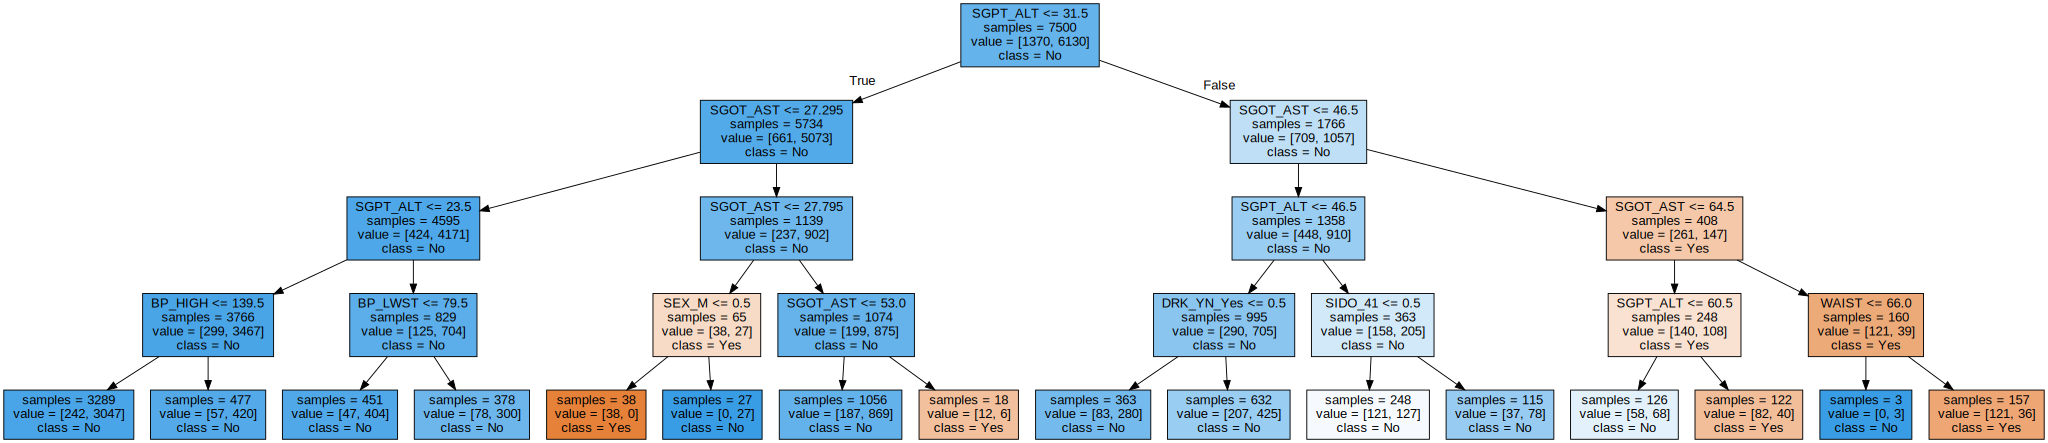

In [17]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "Yes", "No"],
                feature_names=ht.columns[ht.columns != 'GAMMAGTP'], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [18]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.         0.0084365  0.
 0.         0.         0.         0.00423802 0.01035057 0.
 0.         0.         0.         0.28922697 0.59024455 0.
 0.         0.         0.         0.         0.         0.
 0.         0.01046664 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07615947
 0.         0.         0.         0.         0.01087729 0.
 0.        ]


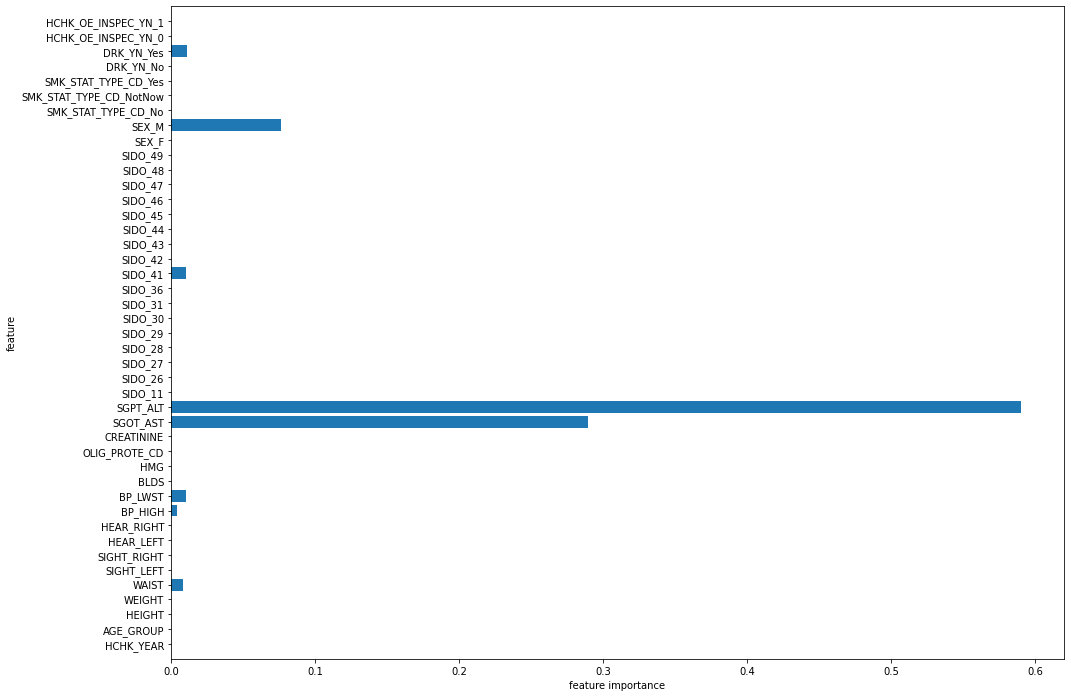

In [19]:
def plot_feature_importances_ht(model):
    plt.rcParams["figure.figsize"] = (16, 12)
    n_features = len(ht.columns[ht.columns != 'GAMMAGTP'])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ht.columns[ht.columns != 'GAMMAGTP'])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_ht(tree)

In [20]:
im_tree = pd.DataFrame(result)
im_tree["name"] = ht.columns[ht.columns != 'GAMMAGTP']
display(im_tree.info())

display(im_tree.sort_values(by=0, ascending = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43 non-null     float64
 1   name    43 non-null     object 
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


None

,0,name
16,0.590245,SGPT_ALT
15,0.289227,SGOT_AST
35,0.076159,SEX_M
40,0.010877,DRK_YN_Yes
25,0.010467,SIDO_41
10,0.010351,BP_LWST
4,0.008436,WAIST
9,0.004238,BP_HIGH
26,0.000000,SIDO_42
27,0.000000,SIDO_43


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.823
시험용 데이터 세트 정확도: 0.819


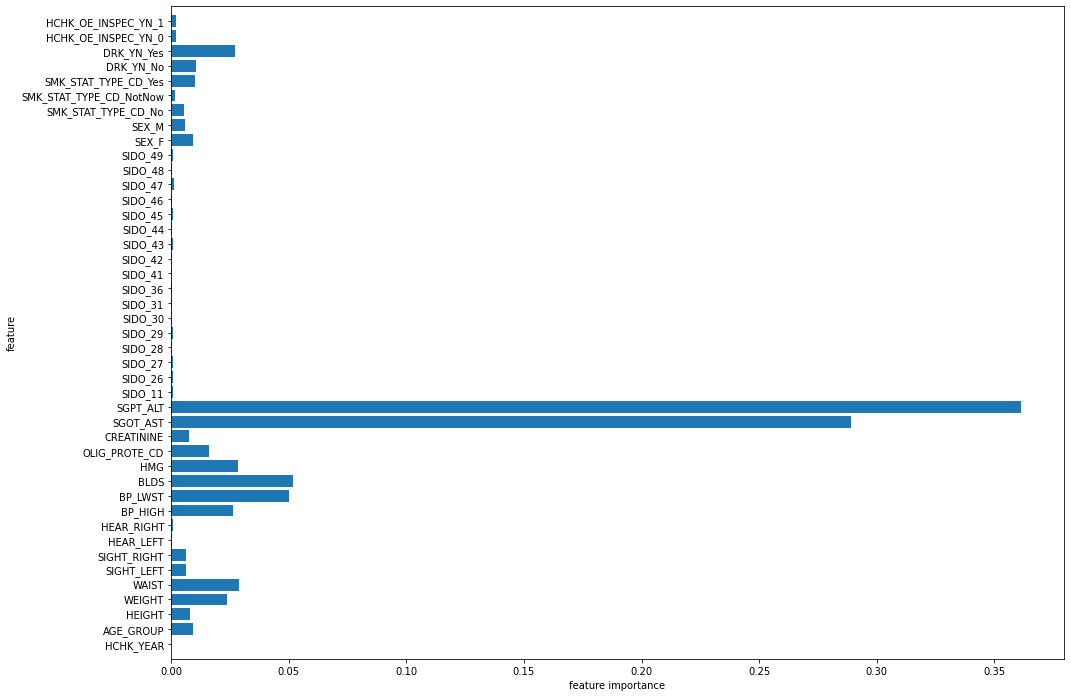

In [23]:
plot_feature_importances_ht(forest)

In [24]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.82933333 0.83066667 0.82533333 0.836      0.82533333 0.83466667
 0.836      0.83066667 0.828      0.836     ]
Random forest:  [0.82       0.82       0.82133333 0.824      0.82133333 0.81733333
 0.82       0.81866667 0.81866667 0.824     ]
Accuracy mean
Decision tree :0.831
Random forest :0.821


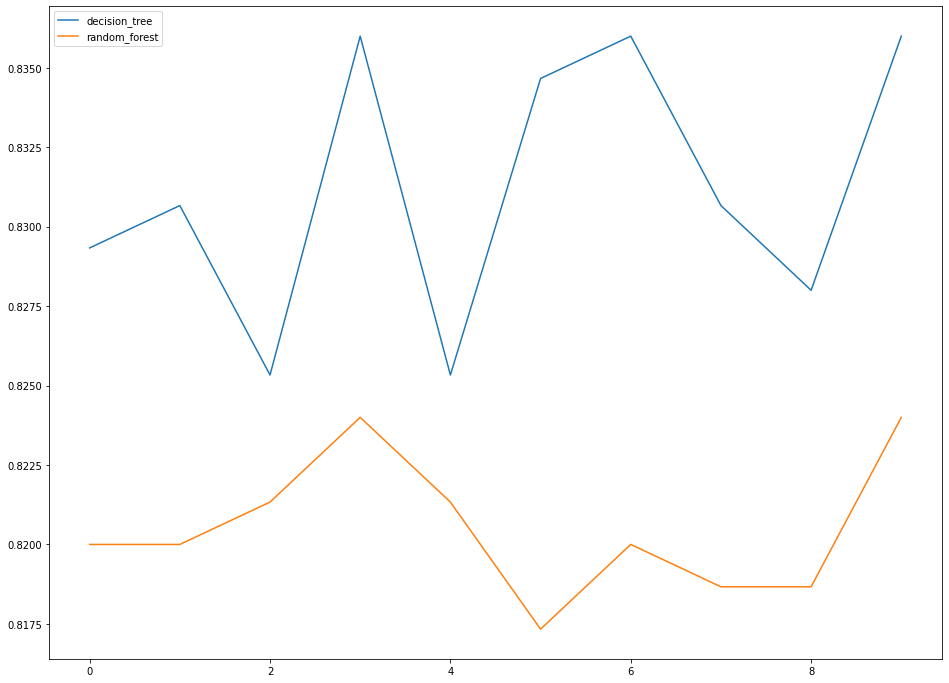

In [25]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

의사결정나무 모델과 랜덤 포레스트 모델의 평균 정확도를 비교해 본 결과, 의사결정나무 모델의 정확도가 더 높다는 것을 알 수 있다.

따라서 본 인사이트는 의사결정나무 모델을 바탕으로 작성하고자 한다.

간 내의 쓸개관에 존재하는 효소로, 간 기능을 나타내는 혈액검사상의 수치인 감마지티피는 쓸개즙 배설 장애 혹은 간세포 장애 발생 시 혈중에 증가하게 된다.

이 감마지티피는 주로 간세포 안에 존재하는 효소인 ALT와 가장 연관이 깊은데, 이 ALT 또한 간세포가 손상을 받는 경우 농도가 증가한다고 한다.

아울러 같은 맥락으로 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소인 AST도 감마지티피와 연관이 깊은데, 이 또한 세포들이 손상을 받는 경우 농도가 증가한다.

이를 통해 ALT, AST 농도가 증가할 경우 감마지티피의 농도 또한 증가한다는 것을 알 수 있고, 이는 간세포가 손상을 입어 장애가 발생했다는 의미이다.